In [1]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ExifTags

In [2]:
#File Names
Filename_1 = 'Test1.jpg'
Filename_2 = 'Test2.jpg'
# if using a different immage set change the image filename reference

In [3]:
# Load Image
Img_Bright_cv2 = cv2.imread(Filename_1)
Img_Dark_cv2 = cv2.imread(Filename_2)

In [4]:
#add using opencv
Img_res_cv2 = cv2.add(Img_Bright_cv2,Img_Dark_cv2)

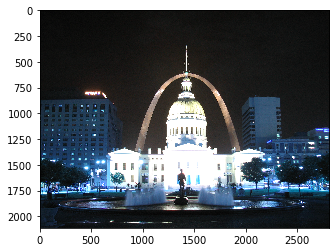

In [5]:
# Save & Show the image 
cv2.imwrite("Img_res_cv2.jpg", Img_res_cv2)
plt.imshow(Img_res_cv2)
#this function just combines both and the brighter image overpowers of effects can be clearly seen. The green traffic light is clearest example.
#noted that these 2 images arent perfectly aligned there is functions to fix this or use a different image set.

In [6]:
#Combine two image via averaging between the two
Img_weighted_cv2 = cv2.addWeighted(Img_Bright_cv2,0.5,Img_Dark_cv2,0.5,0)

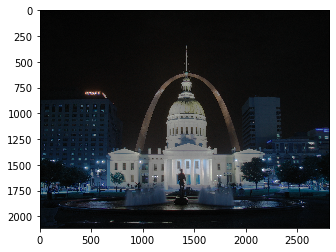

In [7]:
# Save & Show the image 
cv2.imwrite("Img_weighted_cv2.jpg", Img_weighted_cv2)
plt.imshow(Img_weighted_cv2)

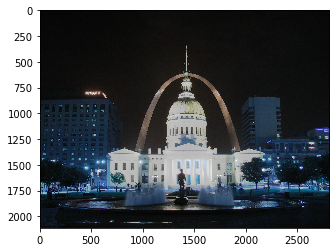

In [8]:
#combine 2 images with a weighting factor
Weight = 0.7

Img_weighted_cv2_1 = cv2.addWeighted(Img_Bright_cv2,Weight,Img_Dark_cv2,(1-Weight),0)
cv2.imwrite("Img_weighted_cv2_1.jpg", Img_weighted_cv2_1)
plt.imshow(Img_weighted_cv2_1)

In [9]:
#Basic Method Completed 

In [10]:
#creating an list of images
input_images = []
input_images.append(Img_Bright_cv2)
input_images.append(Img_Dark_cv2)

#Align Images
#function used AlignMTB 
#MTB is Median Threshold Bitmaps

aligned_images = cv2.createAlignMTB()
aligned_images.process(input_images, input_images)

#applys a shift factor to align

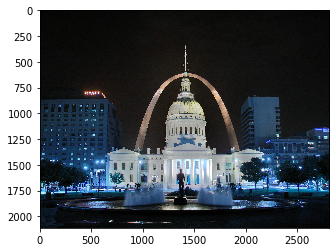

In [11]:
# Mertens Method
merge_mertens = cv2.createMergeMertens()
mertens_result = merge_mertens.process(input_images)
mertens_result__reduced_8bit = np.clip(mertens_result*255, 0, 255).astype('uint8')
cv2.imwrite("Img_mertens_method.jpg", mertens_result__reduced_8bit)
plt.imshow(mertens_result__reduced_8bit)
#noted align and far better result without align there was ghosting

In [12]:
#other method like this can be found here: https://docs.opencv.org/3.4/d2/df0/tutorial_py_hdr.html

In [13]:
#function I created to automatically extract exposure from EXIF metadata
def calc_exposure(image):
    img = Image.open(image) #required to open image as an image for EXIF data
    img_exif = img.getexif()
    if img_exif is None:
        print("Sorry, image has no exif data.")
    else:
        img_exif_dict = dict(img_exif)
    ExpsoureTime = img_exif_dict.get(33434)
    Calc_Exposure = ExpsoureTime[0]/ExpsoureTime[1]
    return Calc_Exposure

#research source: https://stackoverflow.com/questions/4764932/in-python-how-do-i-read-the-exif-data-for-an-image

In [14]:
img1_exp = calc_exposure(Filename_1)
img2_exp = calc_exposure(Filename_2)
#calculating the exposures for the 2 images in the set

In [15]:
exp_times = np.array([img1_exp, img2_exp], dtype=np.float32)
#adding exposures to an array

In [16]:
#Camera Response calibratation
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(input_images, exp_times)

In [17]:
responseDebevec.shape
# this shows there is 8 bits and 3 channels of colour in the image

(256, 1, 3)

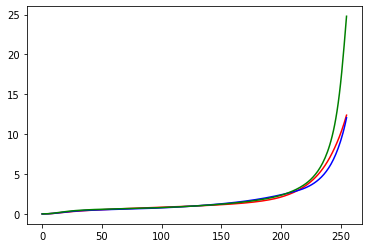

In [18]:
#plotting the colour response
plt.plot(responseDebevec[:,:,0],'r',responseDebevec[:,:,1],'b',responseDebevec[:,:,2],'g')
plt.show()

In [19]:
#Merage to Debevec
mergeDebevec = cv2.createMergeDebevec()
HDR_Debevec = mergeDebevec.process(input_images, exp_times, responseDebevec)

In [20]:
#this file could saved .HDR File and opened in other image processing software appications
cv2.imwrite("Img_HDR_Debevec.hdr", HDR_Debevec)

True

In [21]:
  #TONEMAP USING EXAMPLE
    
   # Tonemap using Reinhard's method to obtain 24-bit color image
  Reinhard_method = cv2.createTonemapReinhard(1.5, 0,0,0)
  Convert_Reinhard = Reinhard_method.process(HDR_Debevec)
  cv2.imwrite("Img_Tonemap_Reinhard.jpg", Convert_Reinhard * 255)

True

In [22]:
#Other image sets
#expanding to 3 and 5 images

In [23]:
#Harbor Set

#File Names
Filename_Harbor_1 = 'Harbor_Set/Izmir Harbor - ppw - 01.tif'
Filename_Harbor_2 = 'Harbor_Set/Izmir Harbor - ppw - 02.tif'
Filename_Harbor_3 = 'Harbor_Set/Izmir Harbor - ppw - 03.tif'
Filename_Harbor_4 = 'Harbor_Set/Izmir Harbor - ppw - 04.tif'
Filename_Harbor_5 = 'Harbor_Set/Izmir Harbor - ppw - 05.tif'
Filename_Harbor_6 = 'Harbor_Set/Izmir Harbor - ppw - 06.tif'

#Exposures
#Harbor_img1_exp = calc_exposure(Filename_Harbor_1)
#Harbor_img2_exp = calc_exposure(Filename_Harbor_2)
#Harbor_img3_exp = calc_exposure(Filename_Harbor_3)
#Harbor_img4_exp = calc_exposure(Filename_Harbor_4)
#Harbor_img5_exp = calc_exposure(Filename_Harbor_5)
#Harbor_img6_exp = calc_exposure(Filename_Harbor_6)

Harbor_exp_times = np.array([1/15.0, 1/30.0, 1/60.0, 1/100.0, 1/200.0, 1/400.0], dtype=np.float32)

#Loading Images
Harbor_1_Img = cv2.imread(Filename_Harbor_1)
Harbor_2_Img = cv2.imread(Filename_Harbor_2)
Harbor_3_Img = cv2.imread(Filename_Harbor_3)
Harbor_4_Img = cv2.imread(Filename_Harbor_4)
Harbor_5_Img = cv2.imread(Filename_Harbor_5)
Harbor_6_Img = cv2.imread(Filename_Harbor_6)

#creating an list of images
Harbor_input_images = []
Harbor_input_images.append(Harbor_1_Img)
Harbor_input_images.append(Harbor_2_Img)
Harbor_input_images.append(Harbor_3_Img)
Harbor_input_images.append(Harbor_4_Img)
Harbor_input_images.append(Harbor_5_Img)
Harbor_input_images.append(Harbor_6_Img)

#Align Images
Harbor_aligned_images = cv2.createAlignMTB()
Harbor_aligned_images.process(Harbor_input_images, Harbor_input_images)

Harbor_calibrateDebevec = cv2.createCalibrateDebevec()
Harbor_responseDebevec = Harbor_calibrateDebevec.process(Harbor_input_images, Harbor_exp_times)

#Merage to Debevec
Harbor_mergeDebevec = cv2.createMergeDebevec()
Harbor_HDR_Debevec = Harbor_mergeDebevec.process(Harbor_input_images, Harbor_exp_times, Harbor_responseDebevec)

# Tonemap using Reinhard's method to obtain 24-bit color image
Harbor_Reinhard_method = cv2.createTonemapReinhard(1.5, 0,0,0)
Harbor_Convert_Reinhard = Harbor_Reinhard_method.process(Harbor_HDR_Debevec)
cv2.imwrite("Img_Harbor_Tonemap_Reinhard.jpg", Harbor_Convert_Reinhard * 255)
    

True